# Making an Excel file with Python

In [1]:
import pandas as pd
import xlsxwriter
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Configure variables

In [2]:
################################ configuration ################################
output_folder = r"C:\\Users\\kelvi\\Desktop"
excel_file_name = "name.xlsx"

# Create a dataframe

In [3]:
################################## make df ####################################
data = [1,2,3,4,5,6,7,8,9,10]
typer = ["a","b","a","b","a","b","a","b","a","b"]

# make a dataframe
df = pd.DataFrame({'data':data, 'type':typer})

# Create graph

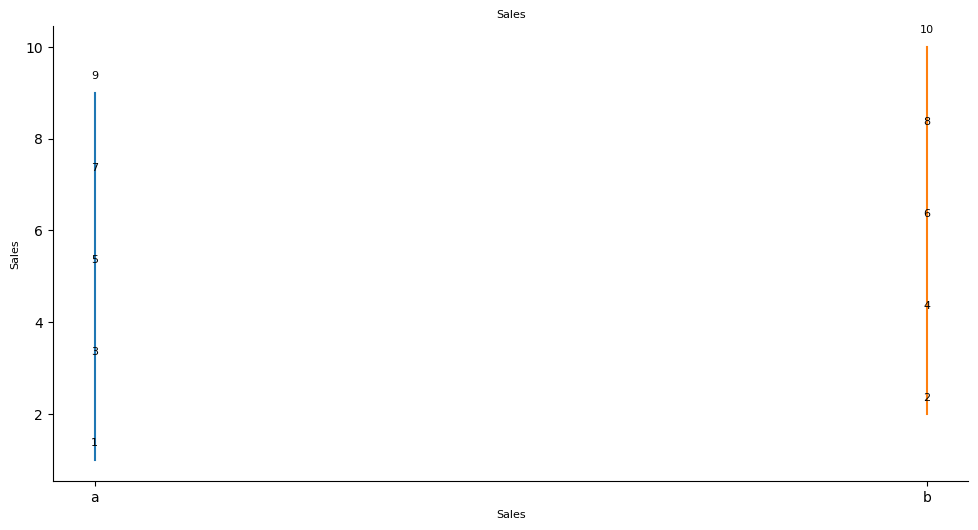

In [4]:
################################### graph #####################################
# make a graph of this data and save it, then remove at end
fig, ax = plt.subplots()

for i in df.type.unique():

    ax.plot(df['type'][df['type']==i],df['data'][df['type']==i])
    # annotate
    for x,y in zip(df['type'][df['type']==i],df['data'][df['type']==i]):
    
        label = "{}".format(y) #"{:.2f}" 2 decimal places or round(y,0)
        
        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     rotation='horizontal', fontsize=8) # horizontal alignment can be left, right or center

ax.set_ylabel('Sales',size=8)
ax.set_xlabel('Sales',size=8)
ax.set_title('Sales',size=8)    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#set size of graph
cmsize=1/2.54
fig.set_size_inches(30*cmsize, 15*cmsize)

#save plot
plt.savefig(rf"{output_folder}\figpath.png", dpi=400, bbox_inches='tight')

# Some Excel formatting (optional)

In [5]:
################# excel formatting ############################################
cell_format_range = 100 # for formatting this many cells vertically and horizontally

# define blank formatting - optional

def blank_format(sheetname):
    fake_df = {'name':['a','b']}
    fake_df = pd.DataFrame(data=fake_df)
    
    fake_df.to_excel(writer, sheet_name=sheetname, startrow=0, startcol=0, index=False)
    
    workbook = writer.book
    worksheet = writer.sheets[sheetname]
    
    # cell formatting white
    cell_format = workbook.add_format()
    cell_format.set_pattern(1) # optional when using solid fill
    cell_format.set_bg_color('white')
    
    for i in range(0,cell_format_range,1):
        for j in range(0,cell_format_range,1):
            worksheet.write(i, j,'',cell_format)

# Finally, write to Excel

In [6]:
############################ write to excel ###################################

with pd.ExcelWriter(output_folder+excel_file_name, engine = "xlsxwriter") as writer: # this can also be initialised at the start of the code
  # these parts below should be written as/when needed
    
  blank_format('Data') # optional for blank formatting
  df.to_excel(writer, sheet_name='Data',index=False) #index=false drops index rows of df
  
  # add table formatting around df
  # add table
  worksheet = writer.sheets['Data']
  startrow = 0
  endrow = startrow + len(df)
  startcol = df.columns.get_loc("data")+0
  endcol = (len(df.columns)-1)+0
  header = [{'header': di} for di in df.columns.tolist()]
  worksheet.add_table(startrow,startcol,endrow,endcol,{'style':'Table style Medium 15','columns':header})
  
  # add the graph to Excel 
  # worksheet = writer.sheets['Data'] # optional as worksheet also defined above
  worksheet.insert_image('L2',rf"{output_folder}\figpath.png") 

  # conditional formatting
  workbook = writer.book
  #worksheet = writher.sheets['Sheet1']
  format1 = workbook.add_format({'bg_color': '#837F7E',
                                   'font_color': '#000000'})      
  # auto adjust column widths
  for column in df:
    column_length = max(df[column].astype(str).map(len).max(), len(column))
    col_idx = df.columns.get_loc(column)
    writer.sheets['Data'].set_column(col_idx, col_idx, column_length)      
    
  #freeze worksheet panes
  worksheet.freeze_panes(0, 1)
  #writer.save()

# Remove any locally stored images

In [7]:
##################### remove any locally saved images #########################
os.remove(rf"{output_folder}\figpath.png")

# Use an Excel file with existing formatting

In [8]:
import shutil

# get file location of existing file
file_location = r"C:\\Users\\kelvi\\Desktop"
file_name = "theme.xlsx"

# copy and save somewhere else with new name
shutil.copy(rf"{file_location}\{file_name}", rf"{file_location}\tester.xlsx")

# write df to this formatted workbook
with pd.ExcelWriter(rf"{file_location}\tester.xlsx", engine="openpyxl",
                    mode='a', if_sheet_exists='overlay') as writer:
    
    df.to_excel(writer, sheet_name="Sheet1", startrow=0,
                startcol=0, header=False, index=False)